# Loading Required Packages

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import statistics as st
from scipy.stats import norm

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
    
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, auc, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Loading the Table

In [6]:
df = pd.read_csv('Customer Churn Data.csv')

In [21]:
df.shape

(98, 16)

In [7]:
df.head()

,Fund ID,Asset ID,Transaction Type,Post Type,Account End Date,Share Quantity,Cancel Indicator,Net Value,Count,Currency,MJR Industry,Flag Type,Broker Key,KPI Client ID,KPI Client Name,Client Fund Group
0,VQ90,AYYQ276,Buy,TRADU,13-01-2022,18,Y,6232.39,4,USD,SW,CA,TRADU-SW,NaN,Kelly-Warren,DC Funds
1,BF27,ACVO308,Buy,TRADS,12-01-2022,13,N,5513.07,5,USD,CP,CA,TRADS-CP,NaN,Reynolds-Sheppard,MJ Funds
2,YE30,TMER415,Buy,TRADC,17-01-2022,38,N,8366.11,1,USD,SJ,CA,TRADC-SJ,NaN,Reynolds-Sheppard,RM Funds
3,XC55,MBTZ482,Sell,TRADU,16-01-2022,2,N,5103.97,2,USD,SJ,CA,TRADU-SJ,NaN,Wilson PLC,MJ Funds
4,ZY12,UWNH428,Sell,TRADB,23-01-2022,3,N,8775.69,5,USD,SI,CA,TRADB-SI,NaN,Love-Jones,MJ Funds


In [8]:
df.columns

Index(['Fund ID', 'Asset ID', 'Transaction Type', 'Post Type',
       'Account End Date', 'Share Quantity', 'Cancel Indicator', 'Net Value',
       'Count', 'Currency', 'MJR Industry', 'Flag Type', 'Broker Key',
       'KPI Client ID', 'KPI Client Name', 'Client Fund Group'],
      dtype='object')

In [9]:
df.describe()

,Share Quantity,Net Value,Count,KPI Client ID
count,98.000000,98.000000,98.000000,0.0
mean,20.132653,6682.314082,3.020408,NaN
std,11.635032,1342.645229,1.346853,NaN
min,1.000000,4567.350000,1.000000,NaN
25%,10.250000,5519.037500,2.000000,NaN
50%,19.000000,6664.610000,3.000000,NaN
75%,30.000000,7751.390000,4.000000,NaN
max,40.000000,9005.340000,5.000000,NaN


In [10]:
df.dtypes

Fund ID               object
Asset ID              object
Transaction Type      object
Post Type             object
Account End Date      object
Share Quantity         int64
Cancel Indicator      object
Net Value            float64
Count                  int64
Currency              object
MJR Industry          object
Flag Type             object
Broker Key            object
KPI Client ID        float64
KPI Client Name       object
Client Fund Group     object
dtype: object

In [17]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Share Quantity', 'Count'], float64: ['Net Value', 'KPI Client ID'], object: ['Fund ID', 'Asset ID', 'Transaction Type', 'Post Type', 'Account End Date', 'Cancel Indicator', 'Currency', 'MJR Industry', 'Flag Type', 'Broker Key', 'KPI Client Name', 'Client Fund Group']}

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fund ID            98 non-null     object 
 1   Asset ID           98 non-null     object 
 2   Transaction Type   98 non-null     object 
 3   Post Type          98 non-null     object 
 4   Account End Date   98 non-null     object 
 5   Share Quantity     98 non-null     int64  
 6   Cancel Indicator   98 non-null     object 
 7   Net Value          98 non-null     float64
 8   Count              98 non-null     int64  
 9   Currency           98 non-null     object 
 10  MJR Industry       98 non-null     object 
 11  Flag Type          98 non-null     object 
 12  Broker Key         98 non-null     object 
 13  KPI Client ID      0 non-null      float64
 14  KPI Client Name    98 non-null     object 
 15  Client Fund Group  98 non-null     object 
dtypes: float64(2), int64(2), obj

In [20]:
df.isna().sum()

Fund ID               0
Asset ID              0
Transaction Type      0
Post Type             0
Account End Date      0
Share Quantity        0
Cancel Indicator      0
Net Value             0
Count                 0
Currency              0
MJR Industry          0
Flag Type             0
Broker Key            0
KPI Client ID        98
KPI Client Name       0
Client Fund Group     0
dtype: int64

# Exploratory Data Analysis

In [22]:
# Unique Value Distribution
df.nunique()

Fund ID              98
Asset ID             98
Transaction Type      2
Post Type             4
Account End Date     30
Share Quantity       39
Cancel Indicator      2
Net Value            98
Count                 5
Currency              1
MJR Industry          4
Flag Type             2
Broker Key           16
KPI Client ID         0
KPI Client Name       8
Client Fund Group     6
dtype: int64

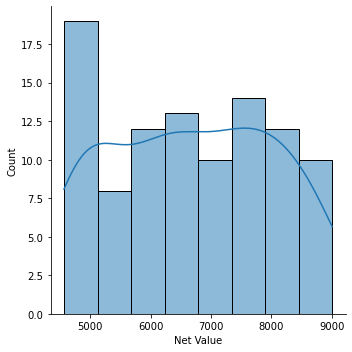

In [25]:
# Checking whethere Net Value can be dropped or not
sns.displot(x = 'Net Value', data = df, kde = True);

* Net Value Column contains different info and shall be retained

In [26]:
# Fund ID, Asset ID, Currency, KPI Client ID columns can be dropped
cols = ['Fund ID', 'Asset ID', 'Currency', 'KPI Client ID']
df1 = df.drop(columns = cols)
df1.head()

,Transaction Type,Post Type,Account End Date,Share Quantity,Cancel Indicator,Net Value,Count,MJR Industry,Flag Type,Broker Key,KPI Client Name,Client Fund Group
0,Buy,TRADU,13-01-2022,18,Y,6232.39,4,SW,CA,TRADU-SW,Kelly-Warren,DC Funds
1,Buy,TRADS,12-01-2022,13,N,5513.07,5,CP,CA,TRADS-CP,Reynolds-Sheppard,MJ Funds
2,Buy,TRADC,17-01-2022,38,N,8366.11,1,SJ,CA,TRADC-SJ,Reynolds-Sheppard,RM Funds
3,Sell,TRADU,16-01-2022,2,N,5103.97,2,SJ,CA,TRADU-SJ,Wilson PLC,MJ Funds
4,Sell,TRADB,23-01-2022,3,N,8775.69,5,SI,CA,TRADB-SI,Love-Jones,MJ Funds


### Distribution of the Target Variable

N    80
Y    18
Name: Cancel Indicator, dtype: int64


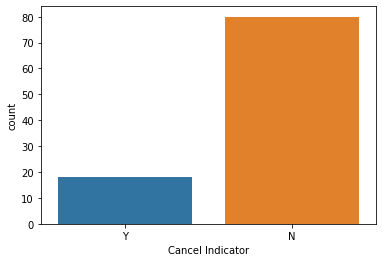

In [33]:
print(df1['Cancel Indicator'].value_counts())
sns.countplot(x = 'Cancel Indicator', data = df1);

* Very highly Imbalanced, Will try to balace the learning by Under-sampling, Over-sampling, SMOTE and Weights

# Exploring other Distributions

In [35]:
df1.columns

Index(['Transaction Type', 'Post Type', 'Account End Date', 'Share Quantity',
       'Cancel Indicator', 'Net Value', 'Count', 'MJR Industry', 'Flag Type',
       'Broker Key', 'KPI Client Name', 'Client Fund Group'],
      dtype='object')

In [48]:
# Converting Account End Date to Data Datatype
df1['Account End Date'] = pd.DatetimeIndex(df1['Account End Date'])

In [50]:
df1.dtypes

Transaction Type             object
Post Type                    object
Account End Date     datetime64[ns]
Share Quantity                int64
Cancel Indicator             object
Net Value                   float64
Count                         int64
MJR Industry                 object
Flag Type                    object
Broker Key                   object
KPI Client Name              object
Client Fund Group            object
dtype: object

In [55]:
numericalcols = list(df1.columns[(df1.dtypes == "int64") | (df1.dtypes == "float64")])
numericalcols

['Share Quantity', 'Net Value', 'Count']

In [56]:
categoricalcols = list(df1.columns[df1.dtypes == "object"])
categoricalcols

['Transaction Type',
 'Post Type',
 'Cancel Indicator',
 'MJR Industry',
 'Flag Type',
 'Broker Key',
 'KPI Client Name',
 'Client Fund Group']

# Distribution of Numerical Columns

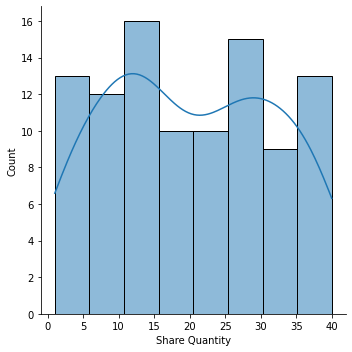

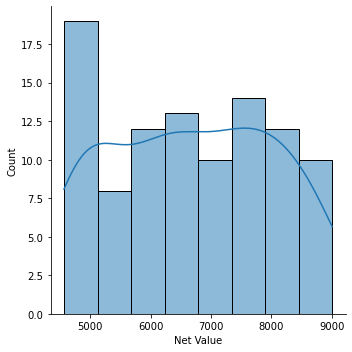

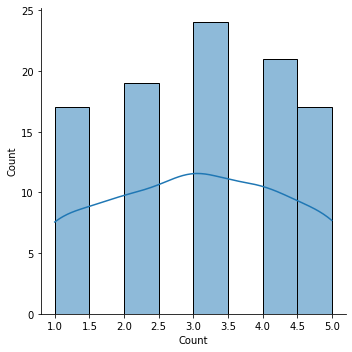

In [70]:
for i in numericalcols:
    sns.displot(x = i, data = df1, kde = True)

# Distribution of Categorical Columns

In [71]:
categoricalcols

['Transaction Type',
 'Post Type',
 'Cancel Indicator',
 'MJR Industry',
 'Flag Type',
 'Broker Key',
 'KPI Client Name',
 'Client Fund Group']

In [72]:
df1[categoricalcols].nunique()

Transaction Type      2
Post Type             4
Cancel Indicator      2
MJR Industry          4
Flag Type             2
Broker Key           16
KPI Client Name       8
Client Fund Group     6
dtype: int64

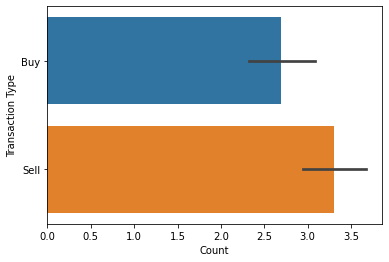

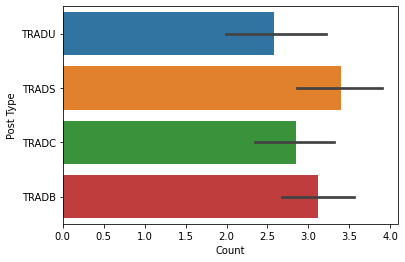

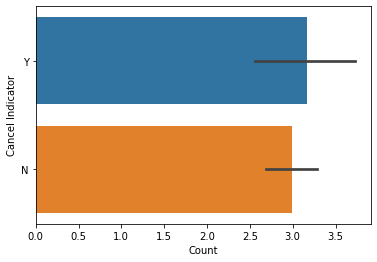

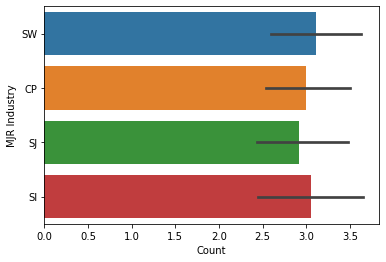

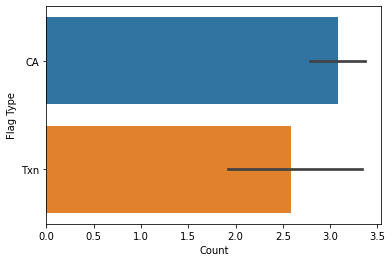

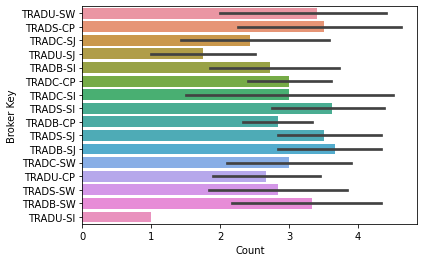

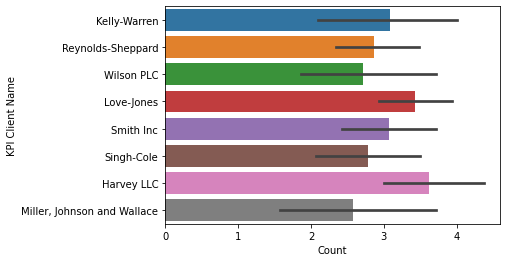

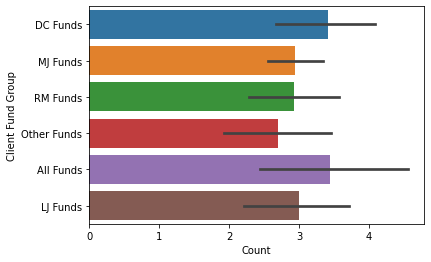

In [85]:
# Categorical Column Distribution by Count Variable
for i in categoricalcols:
    plt.figure(i)
    sns.barplot(x = 'Count', y = i, data = df1);

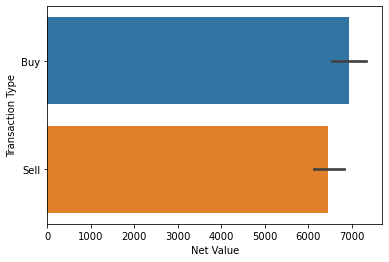

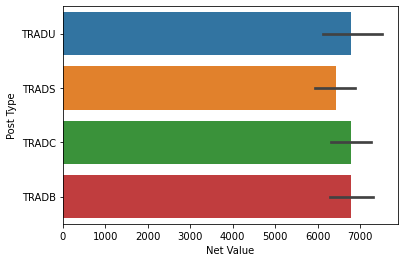

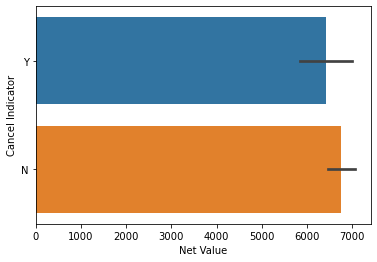

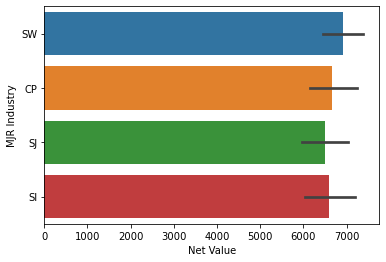

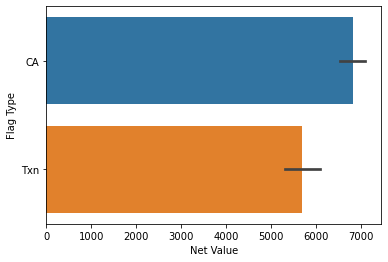

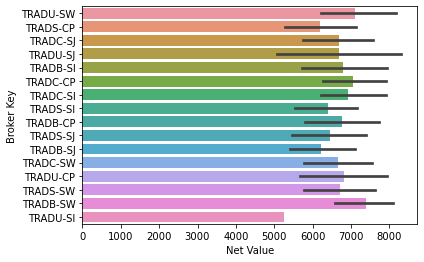

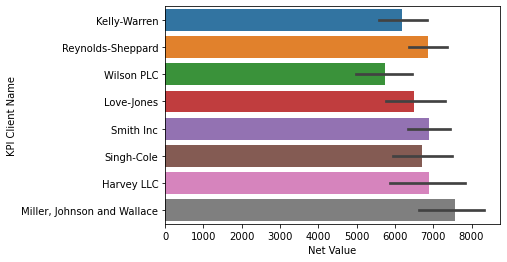

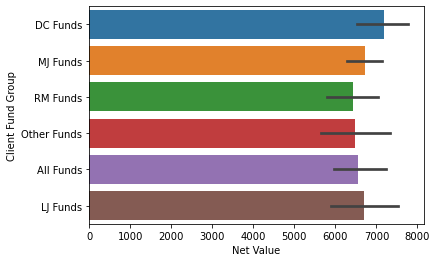

In [86]:
# Categorical Column Distribution by Net Value Variable
for i in categoricalcols:
    plt.figure(i)
    sns.barplot(x = 'Net Value', y = i, data = df1);

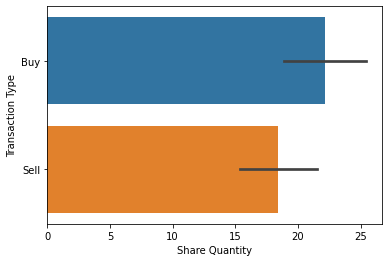

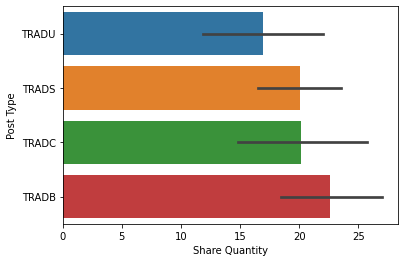

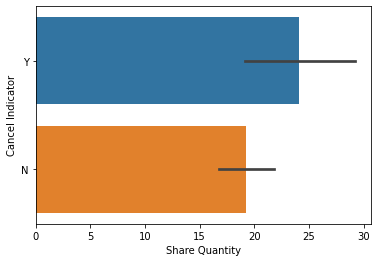

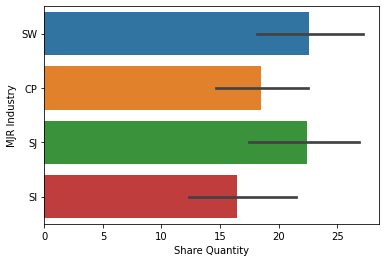

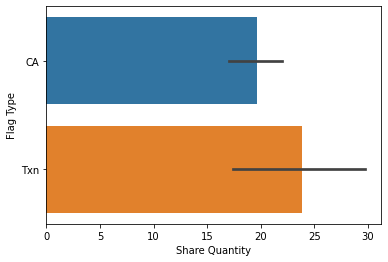

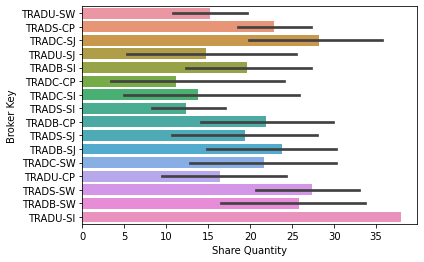

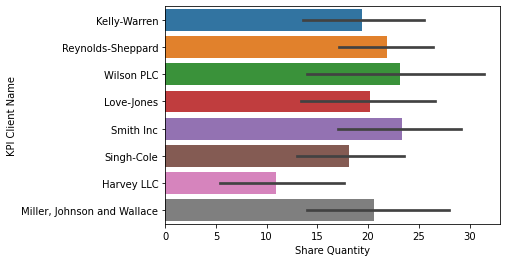

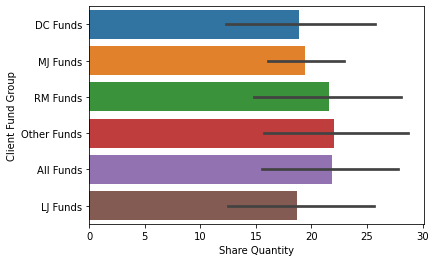

In [87]:
# Categorical Column Distribution by Share Quantity Variable
for i in categoricalcols:
    plt.figure(i)
    sns.barplot(x = 'Share Quantity', y = i, data = df1);

In [121]:
# Encoding Values in the Categorical Columns
cats = df1[categoricalcols].apply(LabelEncoder().fit_transform)
cats.head()

,Transaction Type,Post Type,Cancel Indicator,MJR Industry,Flag Type,Broker Key,KPI Client Name,Client Fund Group
0,0,3,1,3,0,15,1,1
1,0,2,0,0,0,8,4,3
2,0,1,0,2,0,6,4,5
3,1,3,0,2,0,14,7,3
4,1,0,0,1,0,1,2,3


In [122]:
finaldf = cats.join(df1[numericalcols])
finaldf.head()

,Transaction Type,Post Type,Cancel Indicator,MJR Industry,Flag Type,Broker Key,KPI Client Name,Client Fund Group,Share Quantity,Net Value,Count
0,0,3,1,3,0,15,1,1,18,6232.39,4
1,0,2,0,0,0,8,4,3,13,5513.07,5
2,0,1,0,2,0,6,4,5,38,8366.11,1
3,1,3,0,2,0,14,7,3,2,5103.97,2
4,1,0,0,1,0,1,2,3,3,8775.69,5


In [123]:
finaldf.shape

(98, 11)

# Correlation Between Variables

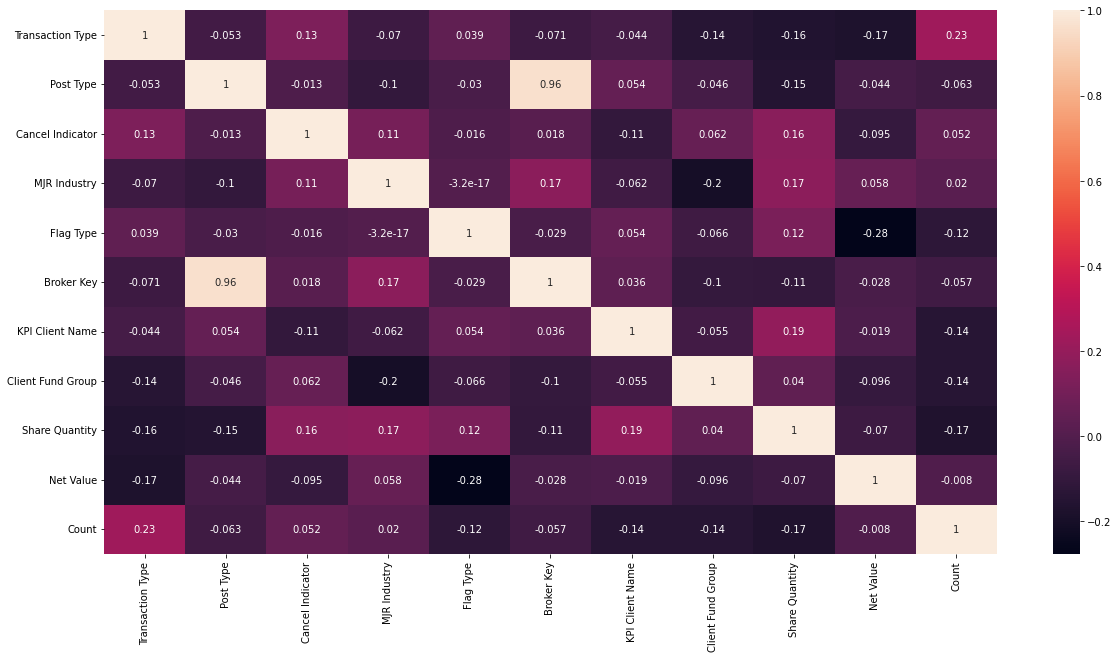

In [118]:
plt.figure(figsize = (20, 10))
sns.heatmap(finaldf.corr(), annot = True);

# Standardization

In [124]:
stddf = finaldf.drop(columns = 'Cancel Indicator')
stddf.head()

,Transaction Type,Post Type,MJR Industry,Flag Type,Broker Key,KPI Client Name,Client Fund Group,Share Quantity,Net Value,Count
0,0,3,3,0,15,1,1,18,6232.39,4
1,0,2,0,0,8,4,3,13,5513.07,5
2,0,1,2,0,6,4,5,38,8366.11,1
3,1,3,2,0,14,7,3,2,5103.97,2
4,1,0,1,0,1,2,3,3,8775.69,5


In [125]:
finaldf = pd.DataFrame(StandardScaler().fit_transform(stddf), columns = stddf.columns)

,Transaction Type,Post Type,MJR Industry,Flag Type,Broker Key,KPI Client Name,Client Fund Group,Share Quantity,Net Value,Count
0,-1.063219,1.480494,1.280393,-0.373544,1.814111,-1.283637,-1.210188,-0.184238,-0.336826,0.731059
1,-1.063219,0.544440,-1.280393,-0.373544,0.191581,0.184804,0.168863,-0.616184,-0.875329,1.477348
2,-1.063219,-0.391615,0.426798,-0.373544,-0.271998,0.184804,1.547915,1.543546,1.260536,-1.507808
3,0.940540,1.480494,0.426798,-0.373544,1.582321,1.653244,0.168863,-1.566466,-1.181592,-0.761519
4,0.940540,-1.327669,-0.426798,-0.373544,-1.430948,-0.794157,0.168863,-1.480077,1.567159,1.477348


In [128]:
finaldf['Churn'] = cats['Cancel Indicator']
finaldf.head(2)

,Transaction Type,Post Type,MJR Industry,Flag Type,Broker Key,KPI Client Name,Client Fund Group,Share Quantity,Net Value,Count,Churn
0,-1.063219,1.480494,1.280393,-0.373544,1.814111,-1.283637,-1.210188,-0.184238,-0.336826,0.731059,1
1,-1.063219,0.544440,-1.280393,-0.373544,0.191581,0.184804,0.168863,-0.616184,-0.875329,1.477348,0


# Train Test Split

In [131]:
x = finaldf.drop(columns = 'Churn')
y = finaldf.iloc[:, -1]

In [132]:
x.head()

,Transaction Type,Post Type,MJR Industry,Flag Type,Broker Key,KPI Client Name,Client Fund Group,Share Quantity,Net Value,Count
0,-1.063219,1.480494,1.280393,-0.373544,1.814111,-1.283637,-1.210188,-0.184238,-0.336826,0.731059
1,-1.063219,0.544440,-1.280393,-0.373544,0.191581,0.184804,0.168863,-0.616184,-0.875329,1.477348
2,-1.063219,-0.391615,0.426798,-0.373544,-0.271998,0.184804,1.547915,1.543546,1.260536,-1.507808
3,0.940540,1.480494,0.426798,-0.373544,1.582321,1.653244,0.168863,-1.566466,-1.181592,-0.761519
4,0.940540,-1.327669,-0.426798,-0.373544,-1.430948,-0.794157,0.168863,-1.480077,1.567159,1.477348


In [133]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
for i in [x_train, x_test, y_train, y_test]:
    print(i.head(2))
    print(i.shape)

    Transaction Type  Post Type  MJR Industry  Flag Type  Broker Key  \
66           0.94054  -0.391615     -1.280393  -0.373544   -0.735578   
55           0.94054  -1.327669      1.280393   2.677063   -0.967368   

    KPI Client Name  Client Fund Group  Share Quantity  Net Value     Count  
66        -1.773117           1.547915       -1.480077  -0.629277 -0.015230  
55        -0.794157          -1.210188       -1.220909  -0.270857  0.731059  
(78, 10)
    Transaction Type  Post Type  MJR Industry  Flag Type  Broker Key  \
91          0.940540    0.54444      0.426798  -0.373544    0.655161   
41         -1.063219    0.54444      1.280393  -0.373544    0.886951   

    KPI Client Name  Client Fund Group  Share Quantity  Net Value     Count  
91        -0.304676           0.168863        0.247708   0.001764  1.477348  
41        -0.304676           0.858389        1.543546   1.318922 -0.761519  
(20, 10)
66    1
55    0
Name: Churn, dtype: int32
(78,)
91    0
41    0
Name: Churn, dty

# Building Models without handling class imbalance

### Logisitic Regression

In [136]:
model = LogisticRegression(max_iter = 1000).fit(x_train, y_train)

In [138]:
y_hat = model.predict(x_test)
# Comparing Actual and Predicted Data
comp = pd.DataFrame({"Actual Class" : y_test, "Predicted Class": y_hat})
comp.head()

,Actual Class,Predicted Class
91,0,0
41,0,0
25,0,0
1,0,0
6,0,0


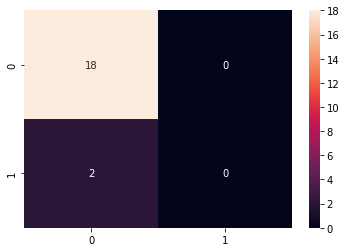

In [139]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True);

In [141]:
# Classification Error Metrics
print('Error Metrics\n\n', classification_report(y_test, y_hat, zero_division = 0))

Error Metrics

               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



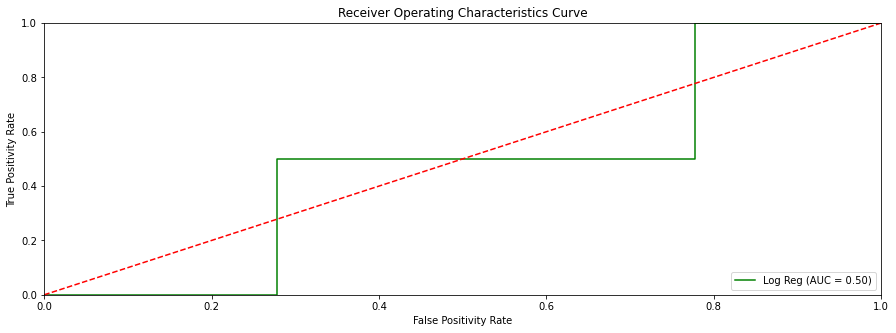

In [143]:
logit_auc_score = roc_auc_score(y_test, y_hat) # Generating AUC Score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1]) # Generating TPR, FPR and Thresholds Score
plt.figure(figsize = (15, 5))
plt.title("Receiver Operating Characteristics Curve")
plt.plot(fpr, tpr, 'g', label = "Log Reg (AUC = %0.2f)" % logit_auc_score) # Plotting ROC curve with AUC score
plt.plot([0, 1], [0, 1],  'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.legend(loc = "lower right");

### Naive Bayes

In [155]:
model = GaussianNB().fit(x_train, y_train)

In [156]:
y_hat = model.predict(x_test)
# Comparing Actual and Predicted Data
comp = pd.DataFrame({"Actual Class" : y_test, "Predicted Class": y_hat})
comp.head()

,Actual Class,Predicted Class
91,0,0
41,0,0
25,0,0
1,0,0
6,0,0


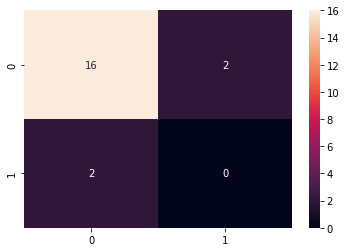

In [157]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True);

In [158]:
# Classification Error Metrics
print('Error Metrics\n\n', classification_report(y_test, y_hat, zero_division = 0))

Error Metrics

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.00      0.00      0.00         2

    accuracy                           0.80        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.80      0.80      0.80        20



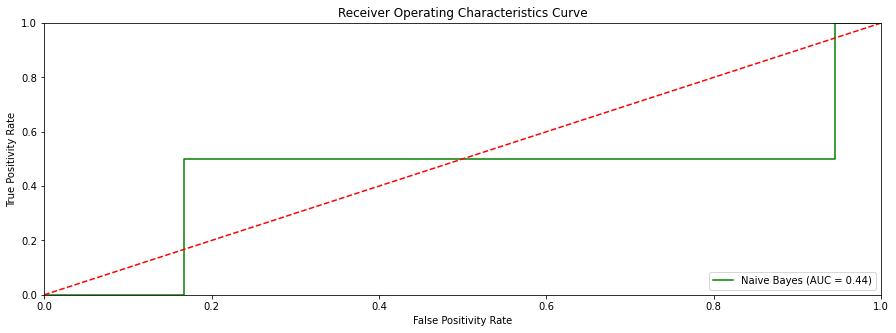

In [159]:
logit_auc_score = roc_auc_score(y_test, y_hat) # Generating AUC Score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1]) # Generating TPR, FPR and Thresholds Score
plt.figure(figsize = (15, 5))
plt.title("Receiver Operating Characteristics Curve")
plt.plot(fpr, tpr, 'g', label = "Naive Bayes (AUC = %0.2f)" % logit_auc_score) # Plotting ROC curve with AUC score
plt.plot([0, 1], [0, 1],  'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.legend(loc = "lower right");

#### KNeighborsClassifier
* SVC

In [160]:
model = KNeighborsClassifier().fit(x_train, y_train)

In [161]:
y_hat = model.predict(x_test)
# Comparing Actual and Predicted Data
comp = pd.DataFrame({"Actual Class" : y_test, "Predicted Class": y_hat})
comp.head()

,Actual Class,Predicted Class
91,0,0
41,0,0
25,0,0
1,0,0
6,0,0


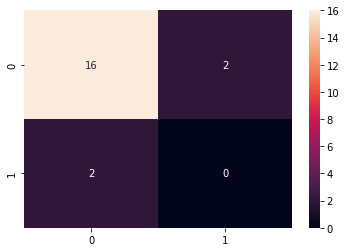

In [162]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True);

In [163]:
# Classification Error Metrics
print('Error Metrics\n\n', classification_report(y_test, y_hat, zero_division = 0))

Error Metrics

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.00      0.00      0.00         2

    accuracy                           0.80        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.80      0.80      0.80        20



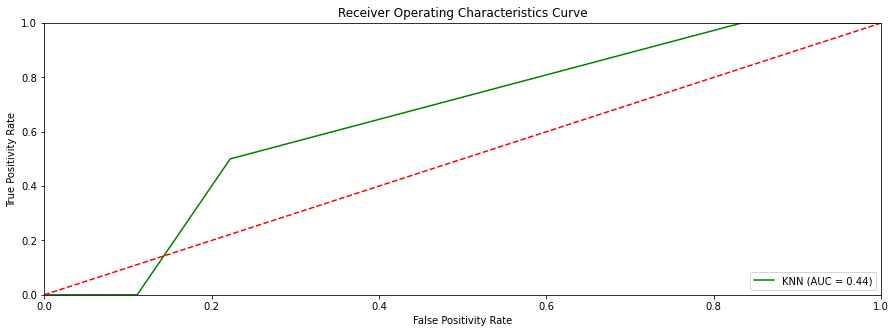

In [164]:
logit_auc_score = roc_auc_score(y_test, y_hat) # Generating AUC Score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1]) # Generating TPR, FPR and Thresholds Score
plt.figure(figsize = (15, 5))
plt.title("Receiver Operating Characteristics Curve")
plt.plot(fpr, tpr, 'g', label = "KNN (AUC = %0.2f)" % logit_auc_score) # Plotting ROC curve with AUC score
plt.plot([0, 1], [0, 1],  'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.legend(loc = "lower right");

# Support Vector Machine

In [172]:
model = SVC(probability=True).fit(x_train, y_train)

In [173]:
y_hat = model.predict(x_test)
# Comparing Actual and Predicted Data
comp = pd.DataFrame({"Actual Class" : y_test, "Predicted Class": y_hat})
comp.head()

,Actual Class,Predicted Class
91,0,0
41,0,0
25,0,0
1,0,0
6,0,0


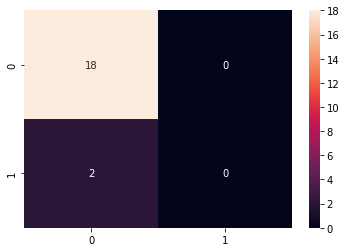

In [174]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True);

In [175]:
# Classification Error Metrics
print('Error Metrics\n\n', classification_report(y_test, y_hat, zero_division = 0))

Error Metrics

               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



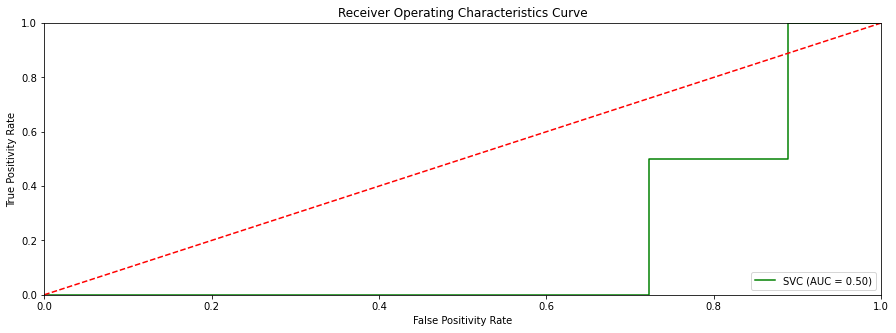

In [176]:
logit_auc_score = roc_auc_score(y_test, y_hat) # Generating AUC Score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1]) # Generating TPR, FPR and Thresholds Score
plt.figure(figsize = (15, 5))
plt.title("Receiver Operating Characteristics Curve")
plt.plot(fpr, tpr, 'g', label = "SVC (AUC = %0.2f)" % logit_auc_score) # Plotting ROC curve with AUC score
plt.plot([0, 1], [0, 1],  'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.legend(loc = "lower right");

# RandomForestClassifier

In [177]:
model = RandomForestClassifier().fit(x_train, y_train)

In [178]:
y_hat = model.predict(x_test)
# Comparing Actual and Predicted Data
comp = pd.DataFrame({"Actual Class" : y_test, "Predicted Class": y_hat})
comp.head()

,Actual Class,Predicted Class
91,0,0
41,0,0
25,0,0
1,0,0
6,0,0


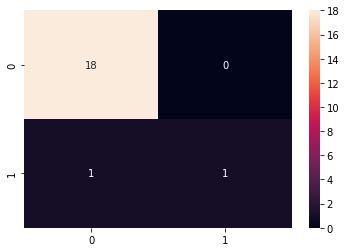

In [179]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True);

In [180]:
# Classification Error Metrics
print('Error Metrics\n\n', classification_report(y_test, y_hat, zero_division = 0))

Error Metrics

               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.97      0.75      0.82        20
weighted avg       0.95      0.95      0.94        20



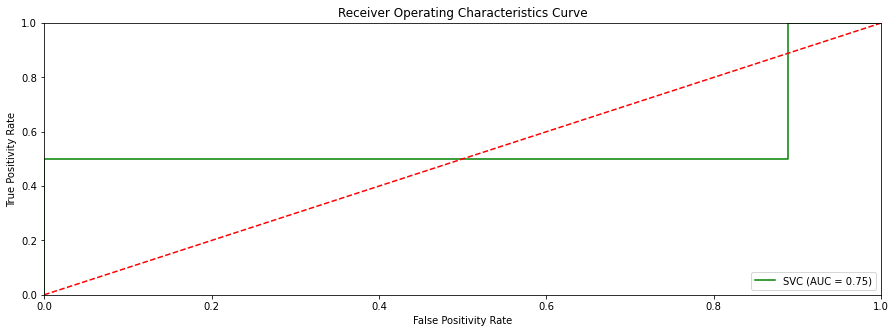

In [181]:
logit_auc_score = roc_auc_score(y_test, y_hat) # Generating AUC Score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1]) # Generating TPR, FPR and Thresholds Score
plt.figure(figsize = (15, 5))
plt.title("Receiver Operating Characteristics Curve")
plt.plot(fpr, tpr, 'g', label = "SVC (AUC = %0.2f)" % logit_auc_score) # Plotting ROC curve with AUC score
plt.plot([0, 1], [0, 1],  'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.legend(loc = "lower right");

# Generalizing the model

In [182]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [184]:
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy', # use 'f1' for F1score metric
                     cv=5,
                     n_jobs=-1)

In [186]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='accuracy')

In [187]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 500}


In [188]:
best_result = gd_sr.best_score_
print(best_result)

0.7825


In [190]:
clf = RandomForestClassifier(bootstrap = True, criterion = 'entropy', n_estimators = 500)
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

#### Finally We can choose RF classifier after hyper parameter optimization
#### we can now use these same parameters after handling class imbalance

# Handling Class Imbalance using SMOTE

In [193]:
# import library
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 80, 1: 18})
Resample dataset shape Counter({1: 80, 0: 80})


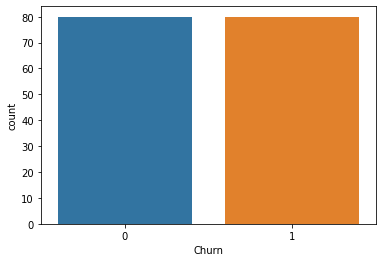

In [198]:
sns.countplot(x = y_smote, data = y_smote);

* Now that the classes are balanced, we can build a model on top of this over-sampled data

In [202]:
finaldf = x_smote.join(y_smote)
finaldf.head()

,Transaction Type,Post Type,MJR Industry,Flag Type,Broker Key,KPI Client Name,Client Fund Group,Share Quantity,Net Value,Count,Churn
0,-1.063219,1.480494,1.280393,-0.373544,1.814111,-1.283637,-1.210188,-0.184238,-0.336826,0.731059,1
1,-1.063219,0.544440,-1.280393,-0.373544,0.191581,0.184804,0.168863,-0.616184,-0.875329,1.477348,0
2,-1.063219,-0.391615,0.426798,-0.373544,-0.271998,0.184804,1.547915,1.543546,1.260536,-1.507808,0
3,0.940540,1.480494,0.426798,-0.373544,1.582321,1.653244,0.168863,-1.566466,-1.181592,-0.761519,0
4,0.940540,-1.327669,-0.426798,-0.373544,-1.430948,-0.794157,0.168863,-1.480077,1.567159,1.477348,0


In [203]:
finaldf.shape

(160, 11)

In [212]:
x = finaldf.drop(columns = "Churn")
y = finaldf.iloc[:, -1]

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
for i in [x_train, x_test, y_train, y_test]:
    print(i.head(2))
    print(i.shape)

    Transaction Type  Post Type  MJR Industry  Flag Type  Broker Key  \
80          0.940540  -0.391615      1.280393  -0.373544   -0.040208   
48         -1.063219  -0.391615      0.426798  -0.373544   -0.271998   

    KPI Client Name  Client Fund Group  Share Quantity  Net Value     Count  
80         0.674284          -0.520662        1.457157  -0.971617 -1.507808  
48         0.184804           1.547915       -0.097849   1.119996 -0.761519  
(128, 10)
     Transaction Type  Post Type  MJR Industry  Flag Type  Broker Key  \
104         -1.063219  -1.327669      1.135723  -0.373544   -1.006652   
42          -1.063219   1.480494     -1.280393  -0.373544    1.118741   

     KPI Client Name  Client Fund Group  Share Quantity  Net Value     Count  
104        -0.794157          -0.976463        1.154065   1.369533 -0.635037  
42          0.184804           1.547915        1.111600  -0.621372 -1.507808  
(32, 10)
80    1
48    0
Name: Churn, dtype: int32
(128,)
104    1
42     0
Name: 

# building the best model on the balanced data

In [214]:
model = RandomForestClassifier(bootstrap = True, criterion = 'entropy', n_estimators = 500)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [215]:
y_hat = model.predict(x_test)
# Comparing Actual and Predicted Data
comp = pd.DataFrame({"Actual Class" : y_test, "Predicted Class": y_hat})
comp.head()

,Actual Class,Predicted Class
104,1,1
42,0,0
55,0,1
102,1,1
33,1,1


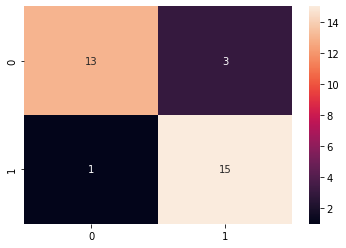

In [216]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True);

In [217]:
# Classification Error Metrics
print('Error Metrics\n\n', classification_report(y_test, y_hat, zero_division = 0))

Error Metrics

               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.83      0.94      0.88        16

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.87        32
weighted avg       0.88      0.88      0.87        32



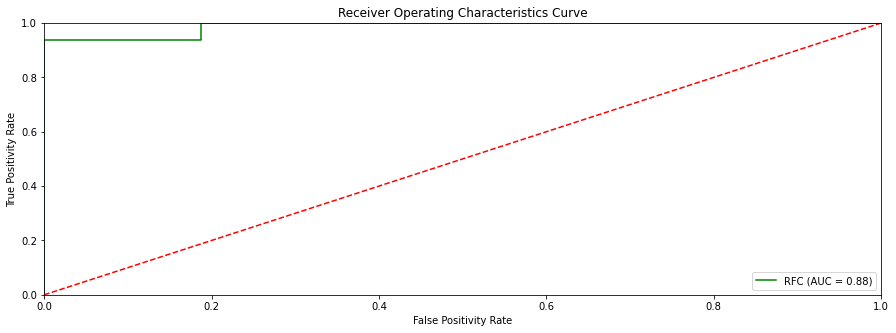

In [218]:
logit_auc_score = roc_auc_score(y_test, y_hat) # Generating AUC Score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1]) # Generating TPR, FPR and Thresholds Score
plt.figure(figsize = (15, 5))
plt.title("Receiver Operating Characteristics Curve")
plt.plot(fpr, tpr, 'g', label = "RFC (AUC = %0.2f)" % logit_auc_score) # Plotting ROC curve with AUC score
plt.plot([0, 1], [0, 1],  'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.legend(loc = "lower right");